<a href="https://colab.research.google.com/github/jechavarria12/World_GDP_Neural_netowrk/blob/main/Copia_de_world_bank_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tratamiento de Datos

In [ ]:
#Instalación de las librerías
!pip install -q pandas
!pip install -q numpy
!pip install -q scipy
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q plotly
!pip install -q yellowbrick
!pip install -q scikit-learn
!pip install -q imbalanced-learn
!pip install -q tqdm
!pip install -q joblib
!pip install -q huggingface_hub
!pip install -q datasets
!pip install -q ydata_profiling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.5/393.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 78.5 MB/s eta 0:00:00


In [ ]:
#Importar el dataset desde Kaggle
!kaggle datasets download sazidthe1/world-gdp-data
DATASET_NAME = 'world-gdp-data'

%cd {ROOT_DIR}
!unzip -o {DATASET_NAME}.zip -d {DATASET_NAME}

Dataset URL: https://www.kaggle.com/datasets/sazidthe1/world-gdp-data
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/108k [00:00<?, ?B/s]
100% 108k/108k [00:00<00:00, 57.3MB/s]
[Errno 2] No such file or directory: '{ROOT_DIR}'
/content
Archive:  world-gdp-data.zip
  inflating: world-gdp-data/country_codes.csv  
  inflating: world-gdp-data/gdp_data.csv  


In [49]:
#Usar pandas para tener los dos dataframes
import pandas as pd
pd.set_option('display.max_columns', None)

df_1=pd.read_csv("world-gdp-data//country_codes.csv")
df_2=pd.read_csv('world-gdp-data//gdp_data.csv')

In [ ]:
#Unir los Dataframes sobre la columna en común, country code
merged_df = pd.merge(df_1, df_2, on='country_code', how='inner')
print(merged_df.describe())
print(merged_df.isna().sum())
merged_df.dropna(inplace=True)

               year         value
count  10548.000000  1.054800e+04
mean    1994.977436  1.902435e+11
std       17.364673  1.031776e+12
min     1960.000000  8.824746e+06
25%     1981.000000  1.547855e+09
50%     1997.000000  8.140967e+09
75%     2010.000000  5.409850e+10
max     2022.000000  2.550000e+13
country_code    0
region          0
income_group    0
country_name    0
year            0
value           0
dtype: int64


In [ ]:
# Pivot the dataframe
pivoted_df = merged_df.pivot_table(index=['country_code', 'region', 'income_group', 'country_name'],
                                   columns='year',
                                   values='value',
                                   aggfunc='first').reset_index()

# Display the pivoted dataframe
display(pivoted_df)

year,country_code,region,income_group,country_name,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ABW,Latin America & Caribbean,High income,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN
1,AFG,South Asia,Low income,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.056449e+10,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,Angola,NaN,NaN,NaN,NaN,NaN,NaN,...,1.330000e+11,1.370000e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.070000e+11
3,ALB,Europe & Central Asia,Upper middle income,Albania,NaN,NaN,NaN,NaN,NaN,NaN,...,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301973e+10,1.515642e+10,1.540183e+10,1.516273e+10,1.793057e+10,1.888210e+10
4,AND,Europe & Central Asia,High income,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,...,3.193513e+09,3.271686e+09,2.789881e+09,2.896610e+09,3.000162e+09,3.218420e+09,3.155149e+09,2.891001e+09,3.325145e+09,3.352033e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,Europe & Central Asia,Upper middle income,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,...,6.735328e+09,7.074393e+09,6.295845e+09,6.682674e+09,7.180769e+09,7.878763e+09,7.899741e+09,7.717143e+09,9.412034e+09,9.429156e+09
210,YEM,Middle East & North Africa,Low income,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,...,4.041523e+10,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN
211,ZAF,Sub-Saharan Africa,Upper middle income,South Africa,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,4.010000e+11,3.810000e+11,3.470000e+11,3.240000e+11,3.810000e+11,4.040000e+11,3.890000e+11,3.380000e+11,4.190000e+11,4.060000e+11
212,ZMB,Sub-Saharan Africa,Lower middle income,Zambia,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.811064e+10,2.214765e+10,2.978445e+10


In [ ]:
#Se rellena los valores no encontrados con -1
pivoted_df=pivoted_df.fillna(-1)
# Display the pivoted dataframe
display(pivoted_df)

year,country_code,region,income_group,country_name,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ABW,Latin America & Caribbean,High income,Aruba,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,-1.000000e+00
1,AFG,South Asia,Low income,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.056449e+10,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,-1.000000e+00
2,AGO,Sub-Saharan Africa,Lower middle income,Angola,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,1.330000e+11,1.370000e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.070000e+11
3,ALB,Europe & Central Asia,Upper middle income,Albania,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301973e+10,1.515642e+10,1.540183e+10,1.516273e+10,1.793057e+10,1.888210e+10
4,AND,Europe & Central Asia,High income,Andorra,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,3.193513e+09,3.271686e+09,2.789881e+09,2.896610e+09,3.000162e+09,3.218420e+09,3.155149e+09,2.891001e+09,3.325145e+09,3.352033e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,Europe & Central Asia,Upper middle income,Kosovo,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,6.735328e+09,7.074393e+09,6.295845e+09,6.682674e+09,7.180769e+09,7.878763e+09,7.899741e+09,7.717143e+09,9.412034e+09,9.429156e+09
210,YEM,Middle East & North Africa,Low income,"Yemen, Rep.",-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,4.041523e+10,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
211,ZAF,Sub-Saharan Africa,Upper middle income,South Africa,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,4.010000e+11,3.810000e+11,3.470000e+11,3.240000e+11,3.810000e+11,4.040000e+11,3.890000e+11,3.380000e+11,4.190000e+11,4.060000e+11
212,ZMB,Sub-Saharan Africa,Lower middle income,Zambia,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.811064e+10,2.214765e+10,2.978445e+10


In [ ]:
#Descargar la base de datos de la población mundial por países en el 2022 para calcular el GDP per cápita de cada país
!kaggle datasets download iamsouravbanerjee/world-population-dataset
DATASET_NAME = 'world-population-dataset'

%cd {ROOT_DIR}
!unzip -o {DATASET_NAME}.zip -d {DATASET_NAME}


Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset
License(s): other
  0% 0.00/15.7k [00:00<?, ?B/s]
100% 15.7k/15.7k [00:00<00:00, 29.3MB/s]
[Errno 2] No such file or directory: '{ROOT_DIR}'
/content
Archive:  world-population-dataset.zip
  inflating: world-population-dataset/world_population.csv  


In [ ]:
#Elimino las variables del data set que no interesan al modelo
df_3=pd.read_csv('world-population-dataset//world_population.csv')
df_3=df_3.drop(columns=["Rank","Country/Territory","Capital","Continent",
                        "2020 Population","2015 Population",'Area (km²)',
                        'Density (per km²)',"2010 Population","2000 Population",
                        "1990 Population","1980 Population","1970 Population",
                        "Growth Rate","World Population Percentage"])
display(df_3.head())
#Cambio el nombre de la columna de los códigos de los países para que sea igual a mi dataset anterior
df_3.rename(columns={'CCA3': 'country_code'}, inplace=True)
#Junto los dos datasets
df_final = pd.merge(pivoted_df, df_3, on='country_code', how='inner')
display(df_final.head())

,CCA3,2022 Population
0,AFG,41128771
1,ALB,2842321
2,DZA,44903225
3,ASM,44273
4,AND,79824


,country_code,region,income_group,country_name,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2022 Population
0,ABW,Latin America & Caribbean,High income,Aruba,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,...,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,-1.000000e+00,106445
1,AFG,South Asia,Low income,Afghanistan,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,...,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,-1.000000e+00,41128771
2,AGO,Sub-Saharan Africa,Lower middle income,Angola,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,...,1.370000e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.070000e+11,35588987
3,ALB,Europe & Central Asia,Upper middle income,Albania,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,...,1.322815e+10,1.138685e+10,1.186120e+10,1.301973e+10,1.515642e+10,1.540183e+10,1.516273e+10,1.793057e+10,1.888210e+10,2842321
4,AND,Europe & Central Asia,High income,Andorra,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,...,3.271686e+09,2.789881e+09,2.896610e+09,3.000162e+09,3.218420e+09,3.155149e+09,2.891001e+09,3.325145e+09,3.352033e+09,79824


In [ ]:
#Creo la columna de GDP per cápita para el 2022 para cada país
df_final["GDP_per_capita_2022"]=df_final[2022]/df_final["2022 Population"]
#Clasifico como GDP bajo hasta al percentil 33, medio hasta el percentil 66 y alto percentil 100
df_final['Clasificacion'] = pd.qcut(
    df_final['GDP_per_capita_2022'],
    q=[0, 0.33, 0.66, 1],  # Define los percentiles 33 y 66
    labels=['GDP bajo', 'GDP medio', 'GDP alto'])
display(df_final.head())



,country_code,region,income_group,country_name,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2022 Population,GDP_per_capita_2022,Clasificacion
0,ABW,Latin America & Caribbean,High income,Aruba,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,...,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,-1.000000e+00,106445,-9.394523e-06,GDP bajo
1,AFG,South Asia,Low income,Afghanistan,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,...,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,-1.000000e+00,41128771,-2.431388e-08,GDP bajo
2,AGO,Sub-Saharan Africa,Lower middle income,Angola,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,...,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.070000e+11,35588987,3.006548e+03,GDP medio
3,ALB,Europe & Central Asia,Upper middle income,Albania,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,...,1.186120e+10,1.301973e+10,1.515642e+10,1.540183e+10,1.516273e+10,1.793057e+10,1.888210e+10,2842321,6.643196e+03,GDP medio
4,AND,Europe & Central Asia,High income,Andorra,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000e+00,...,2.896610e+09,3.000162e+09,3.218420e+09,3.155149e+09,2.891001e+09,3.325145e+09,3.352033e+09,79824,4.199279e+04,GDP alto


In [ ]:
from sklearn.model_selection import train_test_split
# 1. Definir X e y
X = df_final[[1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,
              1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,
                    1986,              1987,              1988,
                    1989,              1990,              1991,
                    1992,              1993,              1994,
                    1995,              1996,              1997,
                    1998,              1999,              2000,
                    2001,              2002,              2003,
                    2004,              2005,              2006,
                    2007,              2008,              2009,
                    2010,              2011,              2012,
                    2013,              2014,              2015,
                    2016,              2017,              2018,
                    2019,              2020,              2021,
                    2022,"income_group"]]
y = df_final['Clasificacion']

# 2. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # Tamaño del conjunto de prueba (20% en este caso)
    random_state=42,  # Semilla para reproducibilidad
    stratify=y       # Mantener la proporción de clases en y
)

In [ ]:
from ydata_profiling import ProfileReport
reporte_train = ProfileReport(X_train, title="Profiling Report Train dataset")
reporte_train.to_file("reporte_train.html")
reporte_train


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Buffered data was truncated after reaching the output size limit.

In [50]:
##Escalamos los datos
#verifica las columnas
print("Columnas en X_train:", X_train.columns.tolist())
print("Columnas en X_test:", X_test.columns.tolist())

#convertimos a strings
X_test.columns = X_test.columns.astype(str)

#verificar
print("Columnas en X_train:", X_train.columns.tolist())
print("Columnas en X_test:", X_test.columns.tolist())

##Separar las columnas de años y no numéricas
#Columnas de años
year_columns = [str(year) for year in range(1960, 2023)]  # Desde 1960 hasta 2022

# Columnas no numéricas (no se escalan)
non_numeric_columns = ['income_group']  # Solo 'income_group' está presente

# Separar las columnas de años y las no numéricas
X_train_years = X_train[year_columns]
X_train_non_numeric = X_train[non_numeric_columns]

X_test_years = X_test[year_columns]
X_test_non_numeric = X_test[non_numeric_columns]

# Escalar las columnas de años
scaler = StandardScaler()
X_train_years_scaled = scaler.fit_transform(X_train_years)
X_test_years_scaled = scaler.transform(X_test_years)

# Convertir a DataFrames
X_train_years_scaled = pd.DataFrame(X_train_years_scaled, columns=year_columns, index=X_train.index)
X_test_years_scaled = pd.DataFrame(X_test_years_scaled, columns=year_columns, index=X_test.index)

# Unir las columnas escaladas con las no numéricas
X_train_scaled = pd.concat([X_train_non_numeric, X_train_years_scaled], axis=1)
X_test_scaled = pd.concat([X_test_non_numeric, X_test_years_scaled], axis=1)

#Verificar
print("X_train escalado:")
display(X_train_scaled.head())

print("X_test escalado:")
display(X_test_scaled.head())

Columnas en X_train: ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', 'income_group']
Columnas en X_test: ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014

,income_group,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
81,Lower middle income,-0.147890,-0.149098,-0.148334,-0.152023,-0.153780,-0.155097,-0.154026,-0.155635,-0.154456,-0.157246,-0.162562,-0.165486,-0.170894,-0.181457,-0.191732,-0.196696,-0.192668,-0.192933,-0.189323,-0.196214,-0.203947,-0.194199,-0.187433,-0.177875,-0.169476,-0.166446,-0.176048,-0.183172,-0.187281,-0.189348,-0.202857,-0.199805,-0.199505,-0.192925,-0.194013,-0.201627,-0.206120,-0.202308,-0.196774,-0.193085,-0.189184,-0.186183,-0.189181,-0.198363,-0.207621,-0.212226,-0.216943,-0.228687,-0.238972,-0.231188,-0.239192,-0.245052,-0.239519,-0.237957,-0.233481,-0.215447,-0.214144,-0.215498,-0.214156,-0.209919,-0.205208,-0.204565,-0.199683
11,High income,-0.001945,0.007300,0.005861,0.005319,0.006096,0.005278,0.005684,0.004525,0.002946,0.001714,0.008037,0.017944,0.032998,0.059507,0.072532,0.079079,0.073664,0.091615,0.099777,0.112309,0.109372,0.050058,0.051689,0.045716,0.019889,0.013096,0.059480,0.088048,0.076270,0.061312,0.095122,0.096961,0.112736,0.093631,0.091773,0.113167,0.101695,0.066850,0.070672,0.055865,0.021571,0.024382,0.033833,0.058963,0.068572,0.061393,0.058300,0.071292,0.079948,0.068449,0.035847,0.037027,0.014261,0.021620,0.020582,-0.003781,-0.000026,-0.001946,0.004094,-0.004682,-0.003410,-0.009459,-0.020232
79,High income,-0.151749,-0.152928,-0.152369,-0.156655,-0.158592,-0.160092,-0.158989,-0.160709,-0.160022,-0.162399,-0.167862,-0.170294,-0.175859,-0.186558,-0.196379,-0.201153,-0.198387,-0.199891,-0.202024,-0.209423,-0.217448,-0.206864,-0.200938,-0.191055,-0.182920,-0.179958,-0.189099,-0.196607,-0.198663,-0.199276,-0.211231,-0.207340,-0.207013,-0.199850,-0.199893,-0.207940,-0.212109,-0.208786,-0.203912,-0.199847,-0.196372,-0.193859,-0.196897,-0.205956,-0.215261,-0.220206,-0.224172,-0.236357,-0.247253,-0.240022,-0.248264,-0.254597,-0.248920,-0.246997,-0.242863,-0.225239,-0.224003,-0.225467,-0.223920,-0.219653,-0.214217,-0.213399,-0.206366
208,Upper middle income,0.048342,0.050343,0.048925,0.054316,0.057217,0.057267,0.057033,0.066393,0.065462,0.071553,0.076107,0.077410,0.056559,0.091075,0.120503,0.099249,0.062082,0.056144,0.048558,0.064542,0.138874,0.130664,0.103891,0.125319,0.070585,-0.000704,-0.005310,0.024820,0.016135,0.012189,0.021126,0.028618,0.033878,0.027053,0.020096,0.020994,0.003421,0.009710,-0.011470,-0.020977,-0.028394,-0.045309,-0.058124,-0.006948,0.026027,0.037269,0.031206,0.026690,-0.008531,0.012762,0.054126,0.054730,0.030510,0.003326,-0.016635,-0.024301,-0.041215,-0.021465,-0.021735,-0.032053,-0.051017,-0.035819,-0.046785
27,High income,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,-0.162522,-0.164358,-0.163088,-0.165468,-0.170981,-0.173315,-0.178596,-0.189144,-0.197324,-0.201809,-0.198506,-0.199633,-0.201799,-0.208810,-0.215806,-0.204881,-0.198505,-0.188587,-0.180190,-0.177281,-0.186467,-0.193500,-0.195762,-0.196081,-0.208242,-0.204410,-0.204411,-0.197359,-0.197584,-0.205809,-0.209907,-0.206514,-0.201259,-0.197179,-0.193766,-0.191268,-0.194322,-0.203455,-0.212750,-0.217531,-0.222616,-0.234810,-0.245911,-0.239016,-0.247462,-0.253939,-0.248565,-0.246676,-0.242521,-0.224978,-0.223803,-0.225341,-0.223763,-0.219580,-0.214609,-0.214782,-0.210337


X_test escalado:


,income_group,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
52,High income,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,0.021814,0.026105,0.017159,0.024264,0.027862,0.031086,0.044248,0.069744,0.064572,0.082019,0.084005,0.081566,0.091491,0.096660,0.065510,0.016673,0.012925,0.007782,-0.006773,-0.005747,0.031836,0.053515,0.041019,0.020049,0.043325,0.035628,0.043735,0.020859,0.022963,0.038360,0.036622,0.016204,0.018860,0.009760,-0.015070,-0.012123,-0.004031,0.014346,0.021300,0.014933,0.013426,0.015540,0.019691,0.005801,-0.015335,-0.022889,-0.039033,-0.032629,-0.033443,-0.050099,-0.047508,-0.048033,-0.045539,-0.053070,-0.042673,-0.044893,-0.051279
133,Upper middle income,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,-0.162522,-0.164358,-0.163088,-0.165468,-0.170981,-0.173315,-0.178596,-0.189144,-0.199736,-0.204657,-0.196790,-0.197758,-0.199531,-0.206440,-0.215327,-0.204778,-0.198810,-0.189068,-0.181110,-0.178214,-0.186681,-0.193094,-0.195094,-0.195735,-0.207056,-0.202945,-0.202329,-0.195501,-0.195567,-0.203373,-0.207173,-0.204321,-0.199550,-0.195533,-0.191985,-0.189543,-0.192445,-0.200811,-0.209786,-0.215146,-0.220235,-0.232041,-0.241941,-0.235409,-0.243459,-0.249268,-0.243977,-0.241872,-0.237492,-0.220708,-0.219363,-0.220607,-0.218882,-0.215126,-0.211307,-0.211916,-0.207371
86,High income,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,-0.162522,-0.164358,-0.163088,-0.165468,-0.170981,-0.173315,-0.178596,-0.189144,-0.199736,-0.204657,-0.201296,-0.202457,-0.204511,-0.211748,-0.219868,-0.208943,-0.202658,-0.192672,-0.184234,-0.181228,-0.190372,-0.197424,-0.199521,-0.200022,-0.211964,-0.207951,-0.207627,-0.200553,-0.200668,-0.207549,-0.211687,-0.208225,-0.203072,-0.198815,-0.195427,-0.192812,-0.195576,-0.204348,-0.213338,-0.218234,-0.223289,-0.234975,-0.245039,-0.238226,-0.246445,-0.252640,-0.247213,-0.245210,-0.240713,-0.223594,-0.222651,-0.224258,-0.222551,-0.218607,-0.213621,-0.216875,-0.212640
101,Lower middle income,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,-0.162522,-0.164358,-0.163088,-0.165468,-0.170814,-0.173151,-0.178415,-0.188877,-0.199074,-0.204267,-0.201033,-0.202236,-0.204289,-0.211561,-0.219699,-0.208784,-0.202513,-0.192547,-0.184108,-0.181138,-0.190293,-0.197341,-0.199428,-0.199935,-0.211885,-0.207868,-0.207548,-0.200481,-0.200590,-0.208695,-0.212957,-0.209671,-0.204736,-0.200587,-0.197088,-0.194577,-0.197605,-0.206618,-0.215909,-0.220843,-0.226093,-0.238427,-0.249453,-0.242368,-0.250660,-0.256987,-0.251438,-0.249510,-0.245234,-0.227648,-0.226465,-0.227940,-0.226246,-0.222096,-0.216815,-0.216777,-0.212549
33,High income,0.066399,0.083772,0.092159,0.097967,0.103541,0.095779,0.092082,0.094376,0.089724,0.087159,-0.170981,-0.173315,-0.178596,-0.189144,-0.199736,-0.204657,-0.201296,-0.202457,-0.204511,-0.211748,0.273637,0.199425,0.207721,0.187447,0.143034,0.129637,0.210759,0.260712,0.248380,0.208682,0.280114,0.263435,0.252381,0.220595,0.230826,0.262781,0.238481,0.173338,0.178089,0.151621,0.112618,0.122835,0.136609,0.160364,0.165952,0.152527,0.148049,0.152531,0.182920,0.186011,0.187200,0.230396,0.194293,0.195722,0.191061,0.179145,0.167020,0.148785,0.141345,0.130217,0.146279,0.129250,0.117436


In [52]:
from sklearn.preprocessing import OneHotEncoder

# Identificar las columnas categóricas
categorical_columns = ['income_group']  # Ajusta según tus datos

# Crear el codificador
encoder = OneHotEncoder(sparse_output=False)  # drop='first' para evitar multicolinealidad

# Ajustar y transformar las columnas categóricas
X_train_categorical_encoded = encoder.fit_transform(X_train_scaled[categorical_columns])
X_test_categorical_encoded = encoder.transform(X_test_scaled[categorical_columns])

# Convertir a DataFrame
X_train_categorical_encoded = pd.DataFrame(
    X_train_categorical_encoded,
    columns=encoder.get_feature_names_out(categorical_columns),
    index=X_train_scaled.index
)
X_test_categorical_encoded = pd.DataFrame(
    X_test_categorical_encoded,
    columns=encoder.get_feature_names_out(categorical_columns),
    index=X_test_scaled.index
)

# Unir con las columnas escaladas y no numéricas
X_train_final = pd.concat([X_train_scaled.drop(columns=categorical_columns), X_train_categorical_encoded], axis=1)
X_test_final = pd.concat([X_test_scaled.drop(columns=categorical_columns), X_test_categorical_encoded], axis=1)

#Verificamos
print("X_train_final:")
display(X_train_final.head())

print("X_test_final:")
display(X_test_final.head())


X_train_final:


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,income_group_High income,income_group_Low income,income_group_Lower middle income,income_group_Upper middle income
81,-0.147890,-0.149098,-0.148334,-0.152023,-0.153780,-0.155097,-0.154026,-0.155635,-0.154456,-0.157246,-0.162562,-0.165486,-0.170894,-0.181457,-0.191732,-0.196696,-0.192668,-0.192933,-0.189323,-0.196214,-0.203947,-0.194199,-0.187433,-0.177875,-0.169476,-0.166446,-0.176048,-0.183172,-0.187281,-0.189348,-0.202857,-0.199805,-0.199505,-0.192925,-0.194013,-0.201627,-0.206120,-0.202308,-0.196774,-0.193085,-0.189184,-0.186183,-0.189181,-0.198363,-0.207621,-0.212226,-0.216943,-0.228687,-0.238972,-0.231188,-0.239192,-0.245052,-0.239519,-0.237957,-0.233481,-0.215447,-0.214144,-0.215498,-0.214156,-0.209919,-0.205208,-0.204565,-0.199683,0.0,0.0,1.0,0.0
11,-0.001945,0.007300,0.005861,0.005319,0.006096,0.005278,0.005684,0.004525,0.002946,0.001714,0.008037,0.017944,0.032998,0.059507,0.072532,0.079079,0.073664,0.091615,0.099777,0.112309,0.109372,0.050058,0.051689,0.045716,0.019889,0.013096,0.059480,0.088048,0.076270,0.061312,0.095122,0.096961,0.112736,0.093631,0.091773,0.113167,0.101695,0.066850,0.070672,0.055865,0.021571,0.024382,0.033833,0.058963,0.068572,0.061393,0.058300,0.071292,0.079948,0.068449,0.035847,0.037027,0.014261,0.021620,0.020582,-0.003781,-0.000026,-0.001946,0.004094,-0.004682,-0.003410,-0.009459,-0.020232,1.0,0.0,0.0,0.0
79,-0.151749,-0.152928,-0.152369,-0.156655,-0.158592,-0.160092,-0.158989,-0.160709,-0.160022,-0.162399,-0.167862,-0.170294,-0.175859,-0.186558,-0.196379,-0.201153,-0.198387,-0.199891,-0.202024,-0.209423,-0.217448,-0.206864,-0.200938,-0.191055,-0.182920,-0.179958,-0.189099,-0.196607,-0.198663,-0.199276,-0.211231,-0.207340,-0.207013,-0.199850,-0.199893,-0.207940,-0.212109,-0.208786,-0.203912,-0.199847,-0.196372,-0.193859,-0.196897,-0.205956,-0.215261,-0.220206,-0.224172,-0.236357,-0.247253,-0.240022,-0.248264,-0.254597,-0.248920,-0.246997,-0.242863,-0.225239,-0.224003,-0.225467,-0.223920,-0.219653,-0.214217,-0.213399,-0.206366,1.0,0.0,0.0,0.0
208,0.048342,0.050343,0.048925,0.054316,0.057217,0.057267,0.057033,0.066393,0.065462,0.071553,0.076107,0.077410,0.056559,0.091075,0.120503,0.099249,0.062082,0.056144,0.048558,0.064542,0.138874,0.130664,0.103891,0.125319,0.070585,-0.000704,-0.005310,0.024820,0.016135,0.012189,0.021126,0.028618,0.033878,0.027053,0.020096,0.020994,0.003421,0.009710,-0.011470,-0.020977,-0.028394,-0.045309,-0.058124,-0.006948,0.026027,0.037269,0.031206,0.026690,-0.008531,0.012762,0.054126,0.054730,0.030510,0.003326,-0.016635,-0.024301,-0.041215,-0.021465,-0.021735,-0.032053,-0.051017,-0.035819,-0.046785,0.0,0.0,0.0,1.0
27,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,-0.162522,-0.164358,-0.163088,-0.165468,-0.170981,-0.173315,-0.178596,-0.189144,-0.197324,-0.201809,-0.198506,-0.199633,-0.201799,-0.208810,-0.215806,-0.204881,-0.198505,-0.188587,-0.180190,-0.177281,-0.186467,-0.193500,-0.195762,-0.196081,-0.208242,-0.204410,-0.204411,-0.197359,-0.197584,-0.205809,-0.209907,-0.206514,-0.201259,-0.197179,-0.193766,-0.191268,-0.194322,-0.203455,-0.212750,-0.217531,-0.222616,-0.234810,-0.245911,-0.239016,-0.247462,-0.253939,-0.248565,-0.246676,-0.242521,-0.224978,-0.223803,-0.225341,-0.223763,-0.219580,-0.214609,-0.214782,-0.210337,1.0,0.0,0.0,0.0


X_test_final:


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,income_group_High income,income_group_Low income,income_group_Lower middle income,income_group_Upper middle income
52,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,0.021814,0.026105,0.017159,0.024264,0.027862,0.031086,0.044248,0.069744,0.064572,0.082019,0.084005,0.081566,0.091491,0.096660,0.065510,0.016673,0.012925,0.007782,-0.006773,-0.005747,0.031836,0.053515,0.041019,0.020049,0.043325,0.035628,0.043735,0.020859,0.022963,0.038360,0.036622,0.016204,0.018860,0.009760,-0.015070,-0.012123,-0.004031,0.014346,0.021300,0.014933,0.013426,0.015540,0.019691,0.005801,-0.015335,-0.022889,-0.039033,-0.032629,-0.033443,-0.050099,-0.047508,-0.048033,-0.045539,-0.053070,-0.042673,-0.044893,-0.051279,1.0,0.0,0.0,0.0
133,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,-0.162522,-0.164358,-0.163088,-0.165468,-0.170981,-0.173315,-0.178596,-0.189144,-0.199736,-0.204657,-0.196790,-0.197758,-0.199531,-0.206440,-0.215327,-0.204778,-0.198810,-0.189068,-0.181110,-0.178214,-0.186681,-0.193094,-0.195094,-0.195735,-0.207056,-0.202945,-0.202329,-0.195501,-0.195567,-0.203373,-0.207173,-0.204321,-0.199550,-0.195533,-0.191985,-0.189543,-0.192445,-0.200811,-0.209786,-0.215146,-0.220235,-0.232041,-0.241941,-0.235409,-0.243459,-0.249268,-0.243977,-0.241872,-0.237492,-0.220708,-0.219363,-0.220607,-0.218882,-0.215126,-0.211307,-0.211916,-0.207371,0.0,0.0,0.0,1.0
86,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,-0.162522,-0.164358,-0.163088,-0.165468,-0.170981,-0.173315,-0.178596,-0.189144,-0.199736,-0.204657,-0.201296,-0.202457,-0.204511,-0.211748,-0.219868,-0.208943,-0.202658,-0.192672,-0.184234,-0.181228,-0.190372,-0.197424,-0.199521,-0.200022,-0.211964,-0.207951,-0.207627,-0.200553,-0.200668,-0.207549,-0.211687,-0.208225,-0.203072,-0.198815,-0.195427,-0.192812,-0.195576,-0.204348,-0.213338,-0.218234,-0.223289,-0.234975,-0.245039,-0.238226,-0.246445,-0.252640,-0.247213,-0.245210,-0.240713,-0.223594,-0.222651,-0.224258,-0.222551,-0.218607,-0.213621,-0.216875,-0.212640,1.0,0.0,0.0,0.0
101,-0.155719,-0.157107,-0.156448,-0.160127,-0.162166,-0.163697,-0.162522,-0.164358,-0.163088,-0.165468,-0.170814,-0.173151,-0.178415,-0.188877,-0.199074,-0.204267,-0.201033,-0.202236,-0.204289,-0.211561,-0.219699,-0.208784,-0.202513,-0.192547,-0.184108,-0.181138,-0.190293,-0.197341,-0.199428,-0.199935,-0.211885,-0.207868,-0.207548,-0.200481,-0.200590,-0.208695,-0.212957,-0.209671,-0.204736,-0.200587,-0.197088,-0.194577,-0.197605,-0.206618,-0.215909,-0.220843,-0.226093,-0.238427,-0.249453,-0.242368,-0.250660,-0.256987,-0.251438,-0.249510,-0.245234,-0.227648,-0.226465,-0.227940,-0.226246,-0.222096,-0.216815,-0.216777,-0.212549,0.0,0.0,1.0,0.0
33,0.066399,0.083772,0.092159,0.097967,0.103541,0.095779,0.092082,0.094376,0.089724,0.087159,-0.170981,-0.173315,-0.178596,-0.189144,-0.199736,-0.204657,-0.201296,-0.202457,-0.204511,-0.211748,0.273637,0.199425,0.207721,0.187447,0.143034,0.129637,0.210759,0.260712,0.248380,0.208682,0.280114,0.263435,0.252381,0.220595,0.230826,0.262781,0.238481,0.173338,0.178089,0.151621,0.112618,0.122835,0.136609,0.160364,0.165952,0.152527,0.148049,0.152531,0.182920,0.186011,0.187200,0.230396,0.194293,0.195722,0.191061,0.179145,0.167020,0.148785,0.141345,0.130217,0.146279,0.129250,0.117436,1.0,0.0,0.0,0.0


##Red Neuronal Tradicional

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Diferentes arquitecturas
    'activation': ['relu', 'tanh'],                              # Funciones de activación
    'learning_rate_init': [0.001, 0.01, 0.1],                    # Tasas de aprendizaje
    'max_iter': [500, 1000],                                     # Número de épocas
    'batch_size': [32, 64, 128],                                 # Tamaño del batch
}

In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Crear el modelo base
mlp = MLPClassifier(random_state=42)

# Implementar Grid Search con validación cruzada
grid_search = GridSearchCV(
    mlp, param_grid,
    cv=5,                  # 5-fold cross validation
    scoring='accuracy',    # Métrica para optimizar (puedes usar 'roc_auc' si es un problema binario)
    n_jobs=-1,             # Usar todos los cores disponibles
    verbose=1              # Mostrar progreso
)

# Entrenar el modelo probando todas las configuraciones
print("🔄 Iniciando entrenamiento con Grid Search...")
grid_search.fit(X_train_final, y_train)

🔄 Iniciando entrenamiento con Grid Search...
Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'batch_size': [32, 64, 128],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [500, 1000]},
             scoring='accuracy', verbose=1)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener el mejor modelo
best_model = grid_search.best_estimator_
print("\n🏆 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test_final)
y_pred_prob = best_model.predict_proba(X_test_final)

# Calcular métricas
cm = confusion_matrix(y_test, y_pred)
print("\n📊 Matriz de Confusión:")
print(cm)

print("\n📝 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Calcular la curva ROC y el AUC (solo para problemas binarios)
if len(best_model.classes_) == 2:  # Verificar si es un problema binario
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    print(f"\n📈 AUC: {roc_auc:.2f}")


🏆 Mejores hiperparámetros encontrados:
{'activation': 'relu', 'batch_size': 128, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'max_iter': 500}

📊 Matriz de Confusión:
[[10  3  2]
 [ 1  8  5]
 [ 0  3 11]]

📝 Reporte de Clasificación:
              precision    recall  f1-score   support

    GDP alto       0.91      0.67      0.77        15
    GDP bajo       0.57      0.57      0.57        14
   GDP medio       0.61      0.79      0.69        14

    accuracy                           0.67        43
   macro avg       0.70      0.67      0.68        43
weighted avg       0.70      0.67      0.68        43



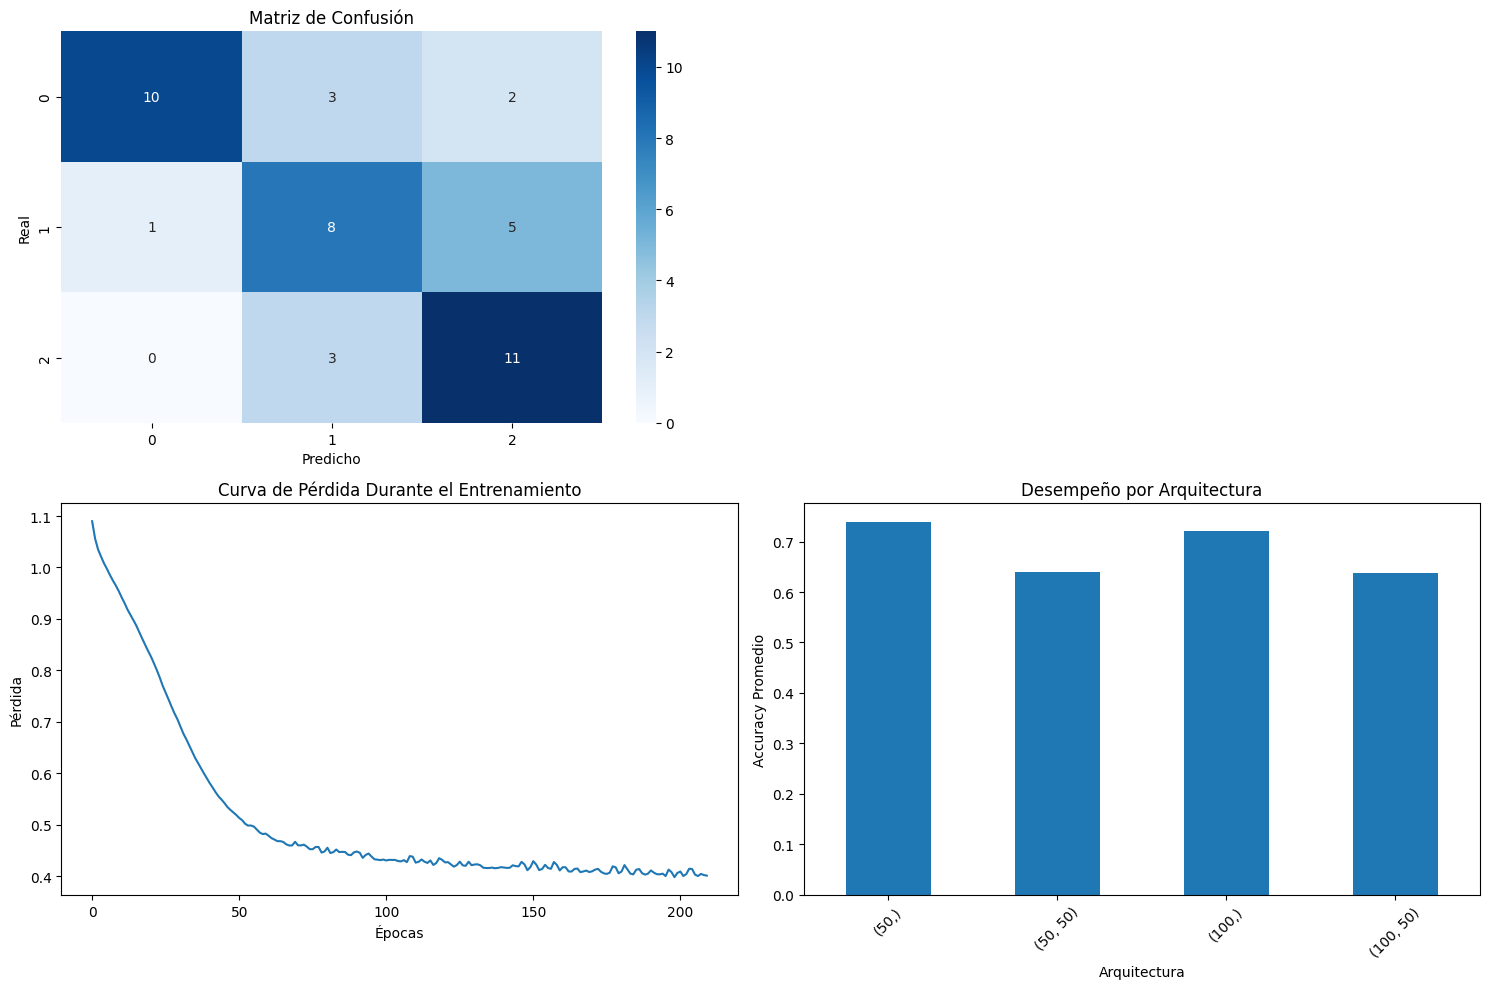

In [48]:
plt.figure(figsize=(15, 10))

#Matriz de Confusión
plt.subplot(2, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')

#Curva de Pérdida
plt.subplot(2, 2, 3)
plt.plot(best_model.loss_curve_)
plt.title('Curva de Pérdida Durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')

#Comparación de Arquitecturas
plt.subplot(2, 2, 4)
results_df = pd.DataFrame(grid_search.cv_results_)
architectures = results_df.groupby('param_hidden_layer_sizes')['mean_test_score'].mean()
architectures.plot(kind='bar')
plt.title('Desempeño por Arquitectura')
plt.xlabel('Arquitectura')
plt.ylabel('Accuracy Promedio')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [46]:
import pandas as pd

# Guardar los resultados del Grid Search
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.to_csv('grid_search_results.csv', index=False)
print("\n💾 Resultados del Grid Search guardados en 'grid_search_results.csv'")


💾 Resultados del Grid Search guardados en 'grid_search_results.csv'
